In [1]:
#models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

#metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score

#packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#work with hyperparameters
from sklearn.model_selection import GridSearchCV

In [2]:
#loading data from wine.csv file
data = pd.read_csv("wine.csv")
wine_data = data.copy()
wine_data.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [3]:
#number of existing data for each attribute
wine_data.count()

type                    6497
fixed acidity           6487
volatile acidity        6489
citric acid             6494
residual sugar          6495
chlorides               6495
free sulfur dioxide     6497
total sulfur dioxide    6497
density                 6497
pH                      6488
sulphates               6493
alcohol                 6497
quality                 6497
dtype: int64

In [4]:
#number of missing data for each attribute
wine_data.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [5]:
wine_data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6487.000000       6489.000000  6494.000000     6495.000000   
mean        7.216579          0.339691     0.318722        5.444326   
std         1.296750          0.164649     0.145265        4.758125   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6495.000000          6497.000000           6497.000000  6497.000000   
mean      0.056042            30.525319            115.744574     0.994697   
std       0.035036            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6488.000000  6493.000000  6497.000000  6497.000000  
mean      3.218395     0.531215    10.491801     5.818378  
std       0.160748     0.148814     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [6]:
#preprocess the data
#num_pipeline = Pipeline([
#    ("imputer", SimpleImputer(strategy="median")),
#    ("scaler", StandardScaler())
#])
#cat_pipeline = Pipeline([
    #return an array instead of sparse matrix
#    ("cat_encoder", OneHotEncoder(sparse=False))
#])

#num_attribs = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "pH", "sulphates"]
#cat_attribs = ["type"]

#preprocess_pipeline = ColumnTransformer([
#    ("num", num_pipeline, num_attribs),
#    ("cat", cat_pipeline, cat_attribs)
#])

#wine_data_preprocessed = preprocess_pipeline.fit_transform(wine_data[num_attribs + cat_attribs])
#wine_data_preprocessed

In [7]:
#fill in the missing numerical values with median
for i in wine_data.columns:
    if (i != 'type'):
        wine_data[i].fillna(wine_data[i].median(), inplace=True)
        print("Median of %s is: %f" %(i, wine_data[i].median()))
print("\nMissing values: ")
wine_data.isna().sum()

Median of fixed acidity is: 7.000000
Median of volatile acidity is: 0.290000
Median of citric acid is: 0.310000
Median of residual sugar is: 3.000000
Median of chlorides is: 0.047000
Median of free sulfur dioxide is: 29.000000
Median of total sulfur dioxide is: 118.000000
Median of density is: 0.994890
Median of pH is: 3.210000
Median of sulphates is: 0.510000
Median of alcohol is: 10.300000
Median of quality is: 6.000000

Missing values: 


type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
#convert categorical values into numerical

wine_data['type'] = wine_data['type'].astype("category").cat.codes

In [9]:
wine_data.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     1            7.0              0.27         0.36            20.7   
1     1            6.3              0.30         0.34             1.6   
2     1            8.1              0.28         0.40             6.9   
3     1            7.2              0.23         0.32             8.5   
4     1            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [10]:
#split input and output data
X = wine_data.drop("type", axis=1)
y = wine_data['type']

In [11]:
#removing the outliers so we can scale the data later
def visualize_remove_with_and_without_outliers(data, col_name):
    plt.figure(figsize=(22, 22))
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.boxplot(data = data, x = col_name, ax = axes[0], color='red').set_title("With outliers, Column: " + col_name)
    #if quantile is lower than q1 - 1.5 * iqr then it is equal to that, if it is higher than q3 + 1.5 * iqr
    #then it is equal to that, else it is the original value
    data[col_name] = data[col_name].apply(lambda q_value: q1 - 1.5 * iqr if q_value < (q1 - 1.5*iqr) 
                                          else (q3 + 1.5 * iqr if q_value > (q3 + 1.5 * iqr) else q_value))
    sns.boxplot(data = data, x = col_name, ax = axes[1], color='green').set_title("Without outliers, Column: " + col_name)
    plt.show()
    return data

<Figure size 1584x1584 with 0 Axes>

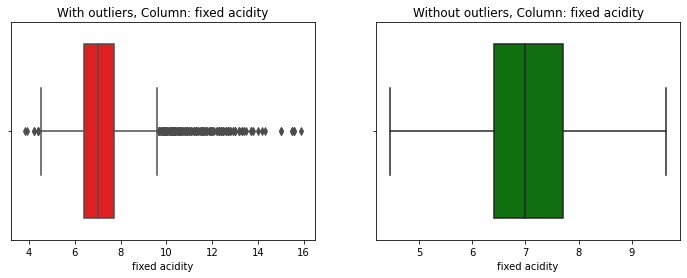

<Figure size 1584x1584 with 0 Axes>

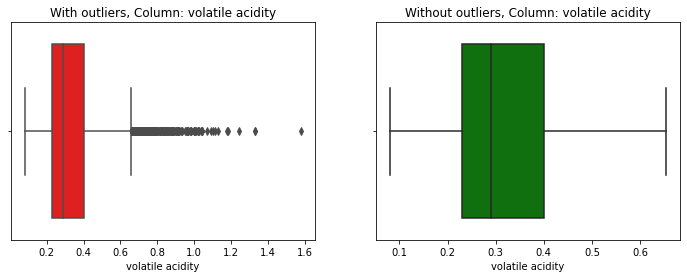

<Figure size 1584x1584 with 0 Axes>

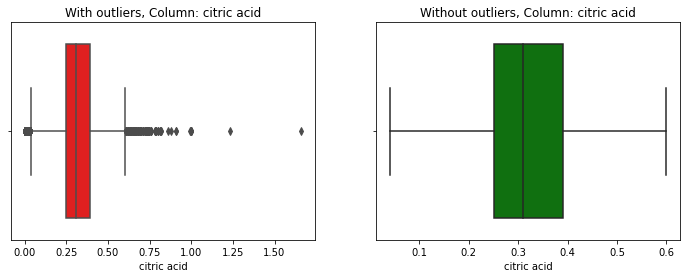

<Figure size 1584x1584 with 0 Axes>

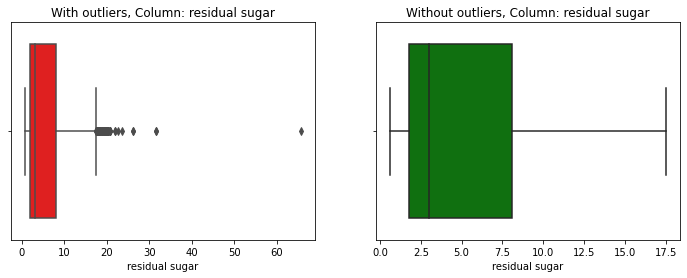

<Figure size 1584x1584 with 0 Axes>

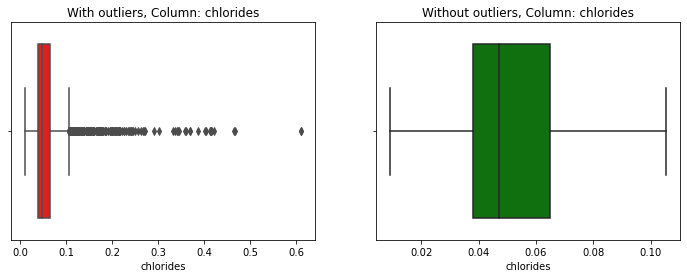

<Figure size 1584x1584 with 0 Axes>

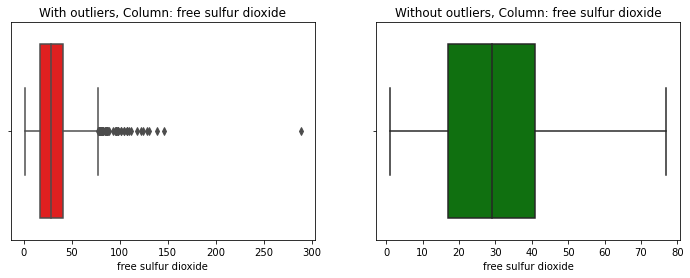

<Figure size 1584x1584 with 0 Axes>

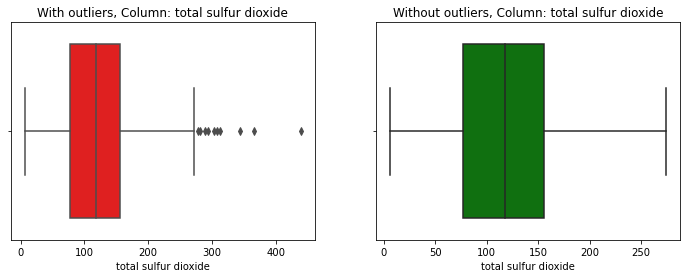

<Figure size 1584x1584 with 0 Axes>

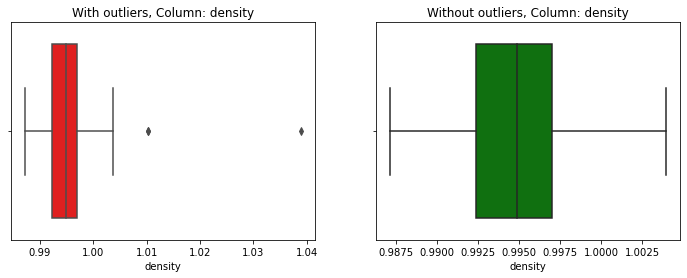

<Figure size 1584x1584 with 0 Axes>

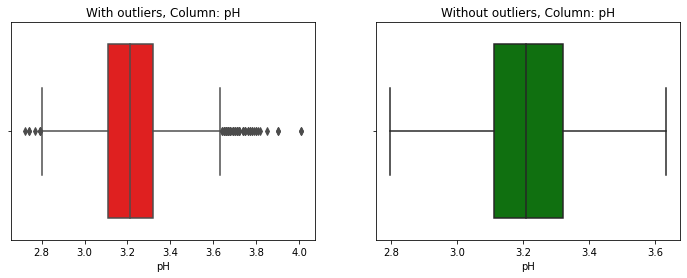

<Figure size 1584x1584 with 0 Axes>

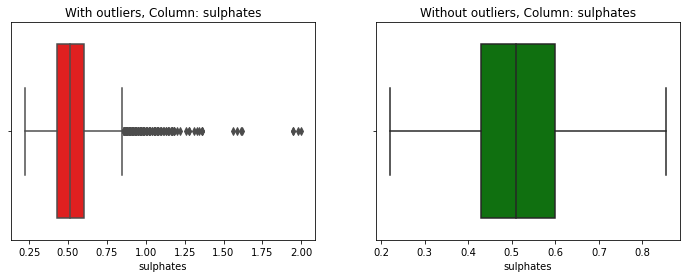

<Figure size 1584x1584 with 0 Axes>

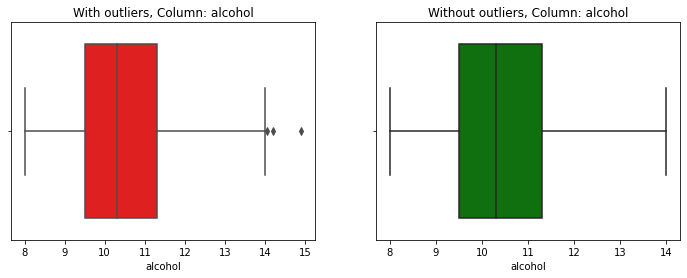

<Figure size 1584x1584 with 0 Axes>

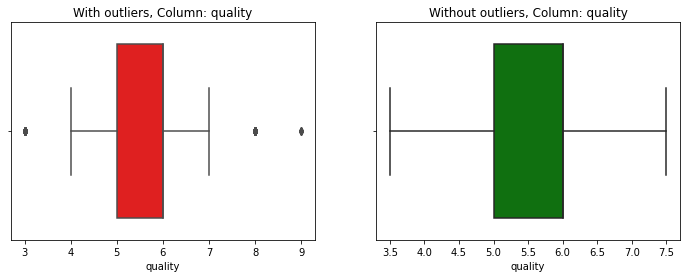

In [12]:
for column in X.columns:
    data = visualize_remove_with_and_without_outliers(wine_data, column)
plt.show()

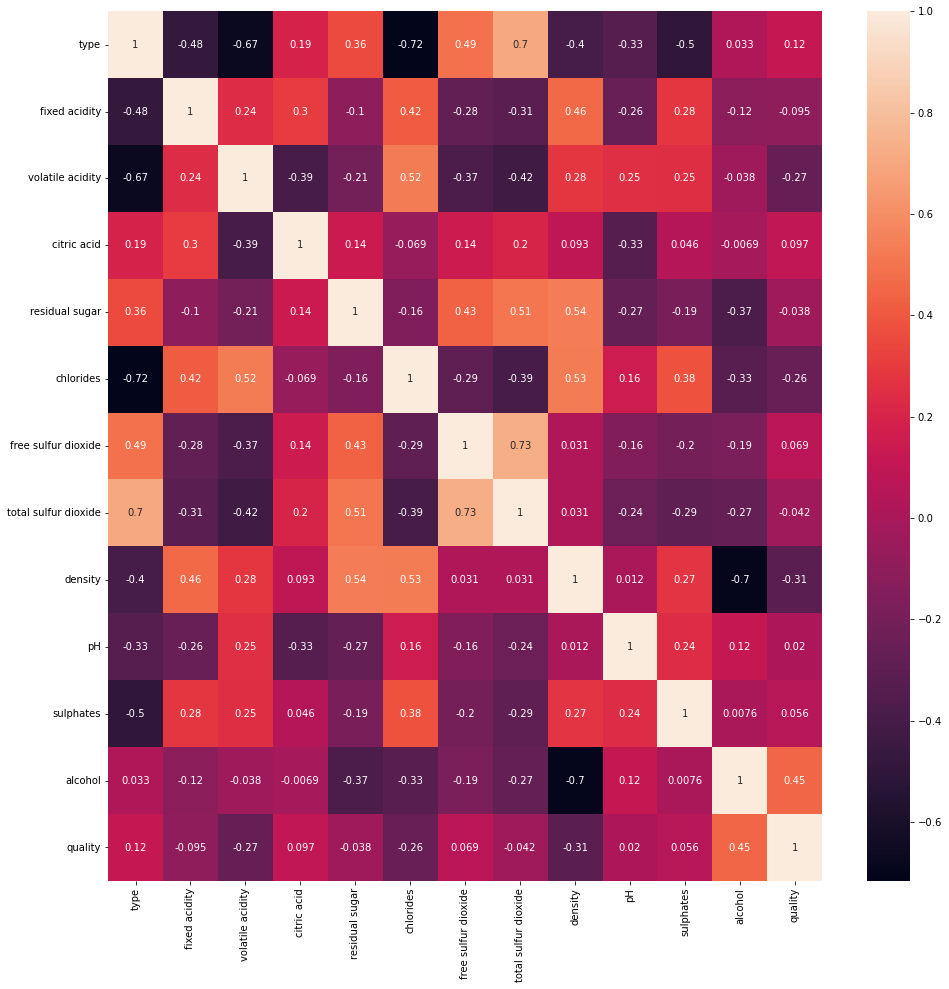

In [13]:
#check if there are highly correlated attributes
plt.figure(figsize=(16, 16))
sns.heatmap(wine_data.corr(), annot=True)
plt.show()

In [14]:
print(X['alcohol'].max())
print(X['alcohol'].min())
print(X['alcohol'].mean())

14.9
8.0
10.491800831149511


[6 5 7 8 4 3 9]
5.818377712790519


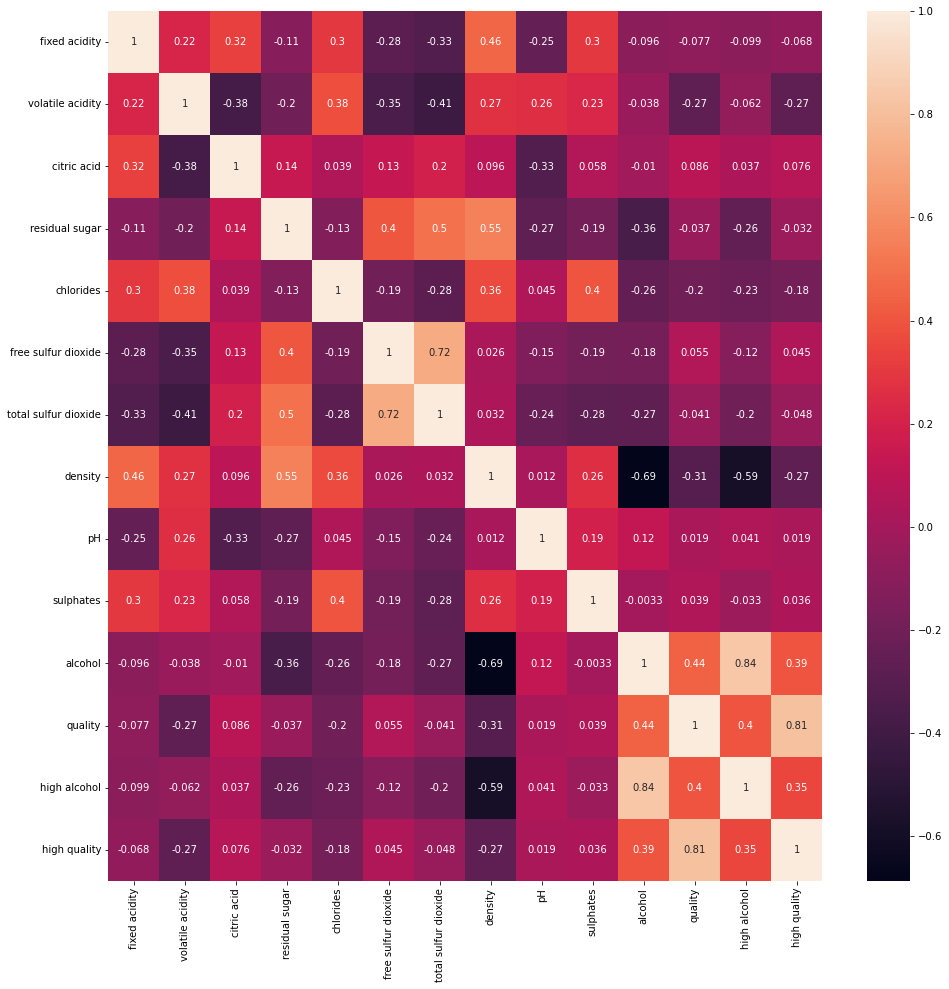

In [15]:
#let's add new features:
# high alcohol, which equals to 1 if it is higher (or equal to) than 11, else 0
X['high alcohol'] = X['alcohol'].apply(lambda x: 1 if x>=11 else 0)

print(X['quality'].unique())
print(X['quality'].mean())
# high quality, if quality is higher or equal to 6
X['high quality'] = X['quality'].apply(lambda x: 1 if x>=6 else 0)
X.head()
plt.figure(figsize=(16, 16))
sns.heatmap(X.corr(), annot=True)
plt.show()

In [16]:
#split the data into train/test set, 70/30
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.3, random_state=123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4547, 14) (1950, 14) (4547,) (1950,)


In [17]:
#scaling the values
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [18]:
#defining the models we are going to use
models = {}

#defining hyperparameters for models
lr_params = [{'penalty': ['none', 'l2', 'l1', 'elasticnet'],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}]

knn_params = [{'n_neighbors': list(range(1, 15)), 'weights': ['uniform', 'distance'],
               'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}]

svc_params = [{'C' : [0.1, 1, 5, 10, 25, 50, 75, 100], 'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
        'degree' : list(range(1, 6)), 'gamma' : ['scale', 'auto']}]

dt_params = [{'criterion' : ['gini', 'entropy', 'log_loss'], 'splitter' : ['best', 'random'],
              'max_depth' : list(range(2, 14, 2))}]

rf_params = [{'criterion': ['gini', 'entropy', 'log_loss'], 'max_depth' : list(range(2, 14, 2)),
              'n_estimators' : list(range(10, 110, 10)), 'max_features' : ['auto', 'sqrt'],
              'min_samples_split' : [2, 5, 10], 'min_samples_leaf' : [1, 2, 4], 'bootstrap' : [True, False]}]

#Best params for Logistic Regression are: 
#{'penalty': 'none', 'solver': 'newton-cg'}
#Best params for K Neighbors Classifier are: 
#{'algorithm': 'auto', 'n_neighbors': 8, 'weights': 'distance'}
#Best params for SVC are: 
#{'C': 5, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}
#Best params for Decision Tree Classifierare: 
#{'criterion': 'entropy', 'max_depth': 12, 'splitter': 'random'}
#Best params for Random Forest are: 
#{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 
#'min_samples_split': 2, 'n_estimators': 70}


#Logistic regression
lr = LogisticRegression(penalty='none', solver='newton-cg')
#grid_lr = GridSearchCV(estimator=lr, param_grid=lr_params, cv=10, scoring='f1')
models["Logistic Regression"] = lr

#KNN
knn = KNeighborsClassifier(algorithm='auto', n_neighbors=8, weights='distance')
#grid_knn = GridSearchCV(estimator=knn, param_grid=knn_params, cv=10, scoring='f1')
models["K Neighbors Classifier"] = knn

#SVC
svc = SVC(C=5, degree=1, gamma='scale', kernel='rbf')
#grid_svc = GridSearchCV(estimator=svc, param_grid=svc_params, cv=10, scoring='f1')
models["SVC"] = svc

#Decision tree
dt = DecisionTreeClassifier(criterion='entropy', max_depth=12, splitter='random')
#grid_dt = GridSearchCV(estimator=dt, param_grid=dt_params, cv=10, scoring='f1')
models["Decision Tree Classifier"] = dt

#Random Forest
rf = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=10, max_features='sqrt', min_samples_leaf=1,
                           min_samples_split=2, n_estimators=70)
#grid_rf = GridSearchCV(estimator=rf, param_grid=rf_params, cv=10, scoring='f1')
models["Random Forest"] = rf

In [19]:
for model in models:
    models[model].fit(X_train,y_train)
    #print("Best params for " + model + " are: ")
    #print(models[model].best_params_)

In [20]:
def model_performance(modelName,model,X_test,y_test):
    print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")    
    print("Model:",modelName)
    y_pred = model.predict(X_test)
    print("Accuracy Score:",accuracy_score(y_test,y_pred))
    cm = confusion_matrix(y_test,y_pred)
    print("Confusion Matrix:\n",cm)
    cmd = ConfusionMatrixDisplay(cm)
    cmd.plot()
    print("Classification Report:\n",classification_report(y_test,y_pred))
    plt.show()
    print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Model: Logistic Regression
Accuracy Score: 0.9933333333333333
Confusion Matrix:
 [[ 462   12]
 [   1 1475]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       474
           1       0.99      1.00      1.00      1476

    accuracy                           0.99      1950
   macro avg       0.99      0.99      0.99      1950
weighted avg       0.99      0.99      0.99      1950



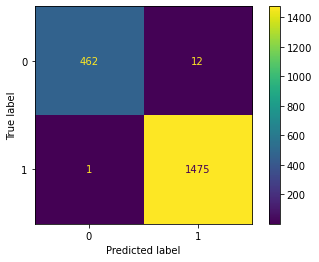

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Model: K Neighbors Classifier
Accuracy Score: 0.9943589743589744
Confusion Matrix:
 [[ 468    6]
 [   5 1471]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       474
           1       1.00      1.00      1.00      1476

    accuracy                           0.99      1950
   macro avg       0.99      0.99      0.99      1950
weighted avg       0.99      0.99      0.99      1950



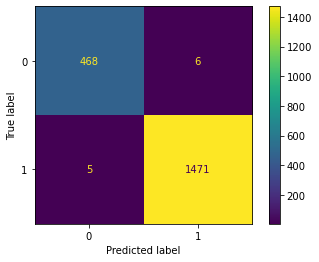

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Model: SVC
Accuracy Score: 0.9974358974358974
Confusion Matrix:
 [[ 470    4]
 [   1 1475]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       474
           1       1.00      1.00      1.00      1476

    accuracy                           1.00      1950
   macro avg       1.00      1.00      1.00      1950
weighted avg       1.00      1.00      1.00      1950



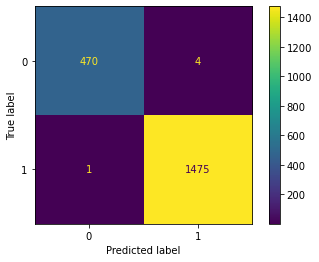

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Model: Decision Tree Classifier
Accuracy Score: 0.9830769230769231
Confusion Matrix:
 [[ 459   15]
 [  18 1458]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       474
           1       0.99      0.99      0.99      1476

    accuracy                           0.98      1950
   macro avg       0.98      0.98      0.98      1950
weighted avg       0.98      0.98      0.98      1950



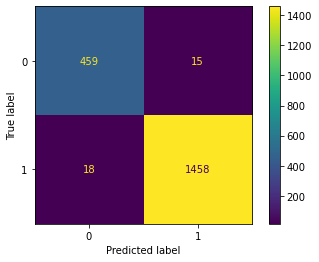

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Model: Random Forest
Accuracy Score: 0.9958974358974358
Confusion Matrix:
 [[ 467    7]
 [   1 1475]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       474
           1       1.00      1.00      1.00      1476

    accuracy                           1.00      1950
   macro avg       1.00      0.99      0.99      1950
weighted avg       1.00      1.00      1.00      1950



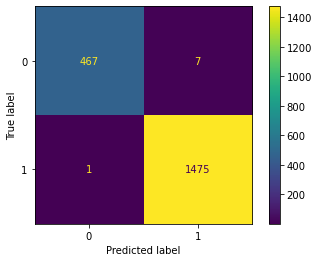

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [21]:
for model in models:
    model_performance(model,models[model],X_test,y_test)

In [22]:
#ensemble method
models_for_ensemble_list = []
for model_for_ensemble in models:
    models_for_ensemble_list.append((model_for_ensemble, models[model_for_ensemble]))
models_for_ensemble_list

[('Logistic Regression',
  LogisticRegression(penalty='none', solver='newton-cg')),
 ('K Neighbors Classifier',
  KNeighborsClassifier(n_neighbors=8, weights='distance')),
 ('SVC', SVC(C=5, degree=1)),
 ('Decision Tree Classifier',
  DecisionTreeClassifier(criterion='entropy', max_depth=12, splitter='random')),
 ('Random Forest',
  RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=10,
                         max_features='sqrt', n_estimators=70))]

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Model: Ensemble of previous methods
Accuracy Score: 0.9974358974358974
Confusion Matrix:
 [[ 469    5]
 [   0 1476]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       474
           1       1.00      1.00      1.00      1476

    accuracy                           1.00      1950
   macro avg       1.00      0.99      1.00      1950
weighted avg       1.00      1.00      1.00      1950



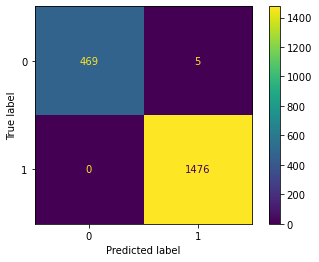

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [25]:
ensemble = VotingClassifier(estimators = models_for_ensemble_list, voting="hard")
ensemble.fit(X_train, y_train)
model_performance("Ensemble of previous methods", ensemble, X_test, y_test)